In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

colors = sns.color_palette("tab10").as_hex()
colors = ["#402040"] + colors
palette = {
    "noir": colors[0],
    "noir-j2": colors[0],
    "noir-shared": colors[0],
    "noir-opt": colors[0],
    "omp": colors[4],
    "mpi": colors[4],
    "mpi-mmap": colors[4],
    "mpi-opemp": colors[4],
    "openmp": colors[4],
    "rayon": colors[3],
    "flink": colors[2],
    "timely": colors[5],
    "ideal": colors[8],
    "linear": colors[8],
}
linestyles = ["-", "--", ":", "-."]
sns.set_theme(context='paper', style='whitegrid', palette="tab10", font='Times New Roman', font_scale=2.5)

In [2]:
df = pd.read_csv("../../loc/gzipped.csv", dtype={"size": "int64"})
df.sort_values(["experiment"])
df = df[df["set"].isin(["batch", "streaming"])]
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 64
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   set         56 non-null     object
 1   experiment  56 non-null     object
 2   system      56 non-null     object
 3   size        56 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.2+ KB
None


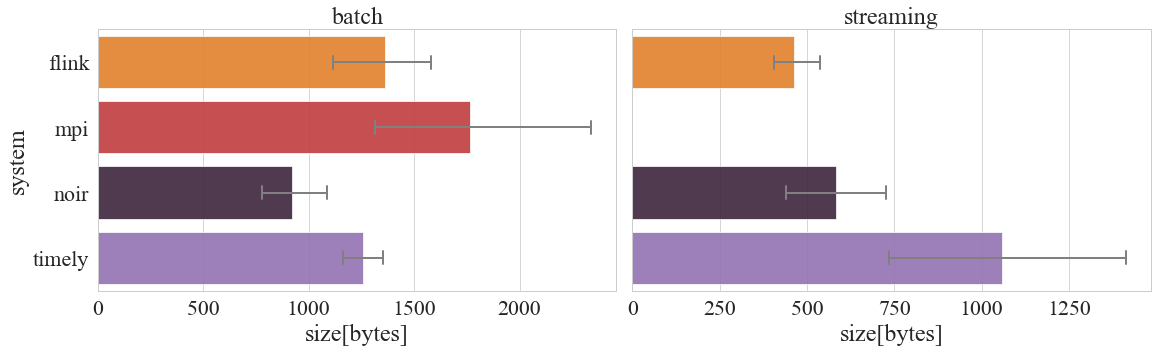

In [3]:
g = sns.catplot(data=df, x="size", y="system", kind="bar", col="set", sharex=False, facet_kws={"despine": False},
            errorbar=("ci", 90), palette=palette, errwidth=2, capsize=0.2, errcolor=".5", aspect=1.618, alpha=0.9)
g.set_titles(template="{col_name}")
g.set_axis_labels(x_var="size[bytes]")
plt.tight_layout()
plt.xlim((0, None))
plt.savefig("plots/loc-gz-bar.pdf", bbox_inches="tight")

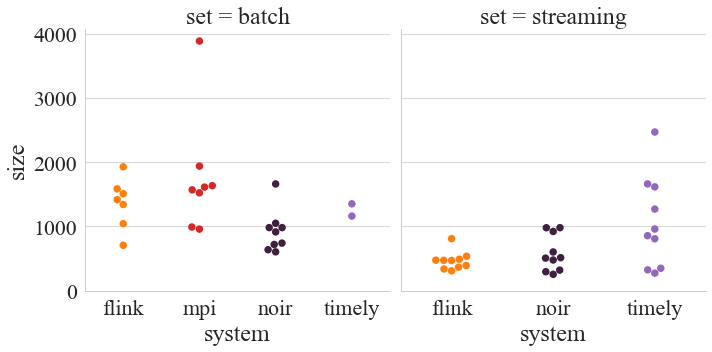

In [4]:
sns.catplot(data=df, x="system", y="size", hue="system", kind="swarm", col="set", size=7.5, palette=palette, sharex=False)
plt.ylim((0, None))
plt.savefig("plots/loc-gz-swarm.pdf")

(0.0, 1.0)

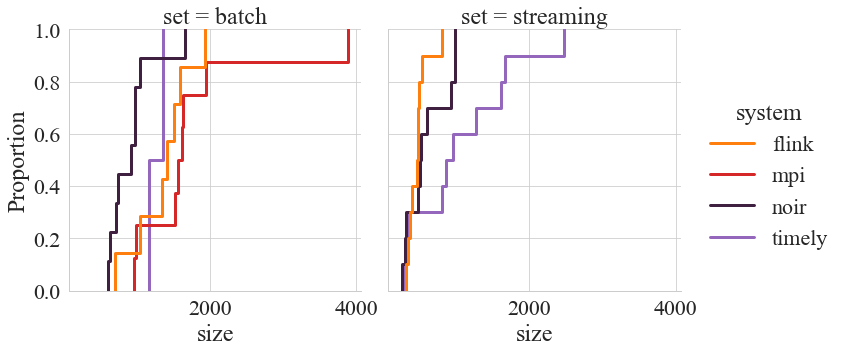

In [5]:
sns.displot(data=df, x="size", hue="system", kind="ecdf", col="set", palette=palette, linewidth=3)
plt.ylim((0, None))